In [57]:
%load_ext autotime
from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import numpy as np
import pickle

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, roc_auc_score

from sklearn.model_selection import train_test_split

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2022-10-01 14:10:29 +07:00)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [48]:
df = pd.read_csv('Train_Preprocessed.csv')
df.head()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,...,Extra_Kurikuler_Ekskul_3,Extra_Kurikuler_Ekskul_4,Extra_Kurikuler_Ekskul_5,Extra_Kurikuler_Ekskul_6,Extra_Kurikuler_Tidak,Tinggal_Dengan_Orang Tua,Tinggal_Dengan_Others,Status_Kerja_Belum,Biaya_Orang Tua,Biaya_Others
0,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,70.7,...,0,1,0,0,0,0,0,1,0,0
1,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,62.8,...,0,1,0,0,0,0,1,1,0,1
2,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,65.9,...,0,0,0,0,0,0,1,0,0,0
3,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,61.7,...,0,1,0,0,0,1,0,1,0,0
4,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,79.0,...,0,0,0,0,0,1,0,0,0,1


time: 62 ms (started: 2022-10-01 12:21:08 +07:00)


In [49]:
df.columns

Index(['Bahasa', 'Inggris', 'TIK', 'Matematika', 'Fisika', 'Kimia', 'Biologi',
       'Geografi', 'Sosiologi', 'Antropologi', 'Fakultas', 'Mean_Nilai',
       'Mean_IPA', 'Mean_Bahasa', 'Mean_IPS', 'Gender_Wanita',
       'Extra_Kurikuler_Ekskul_2', 'Extra_Kurikuler_Ekskul_3',
       'Extra_Kurikuler_Ekskul_4', 'Extra_Kurikuler_Ekskul_5',
       'Extra_Kurikuler_Ekskul_6', 'Extra_Kurikuler_Tidak',
       'Tinggal_Dengan_Orang Tua', 'Tinggal_Dengan_Others',
       'Status_Kerja_Belum', 'Biaya_Orang Tua', 'Biaya_Others'],
      dtype='object')

time: 0 ns (started: 2022-10-01 12:21:10 +07:00)


In [50]:
df = pd.read_csv('Train_Preprocessed.csv')
df.head()
y = df['Fakultas']
X = df.drop(['Fakultas'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, random_state=1234)

time: 16 ms (started: 2022-10-01 12:21:12 +07:00)


In [51]:
#Decision Tree
DT = DecisionTreeClassifier(random_state = 1311)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)
print(classification_report(y_true = y_test, y_pred = DT_pred))

              precision    recall  f1-score   support

         DKV       0.20      0.21      0.20       568
       FIKOM       0.22      0.23      0.23       586
       FISIP       0.22      0.20      0.21       578
          FT       0.20      0.21      0.21       575
         FTI       0.21      0.21      0.21       568

    accuracy                           0.21      2875
   macro avg       0.21      0.21      0.21      2875
weighted avg       0.21      0.21      0.21      2875

time: 235 ms (started: 2022-10-01 12:21:12 +07:00)


In [52]:
#Random Forest
RF = RandomForestClassifier(random_state = 1311, n_jobs = -1, verbose = 3)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
print(classification_report(y_true = y_test, y_pred = RF_pred))

              precision    recall  f1-score   support

         DKV       0.20      0.21      0.20       568
       FIKOM       0.20      0.18      0.19       586
       FISIP       0.18      0.18      0.18       578
          FT       0.18      0.20      0.19       575
         FTI       0.19      0.19      0.19       568

    accuracy                           0.19      2875
   macro avg       0.19      0.19      0.19      2875
weighted avg       0.19      0.19      0.19      2875

time: 594 ms (started: 2022-10-01 12:21:14 +07:00)


In [53]:
#LightGBM
GBM = LGBMClassifier(random_state = 1311, n_jobs = -1, verbose = 3)
GBM.fit(X_train, y_train)
GBM_pred = GBM.predict(X_test)
print(classification_report(y_true = y_test, y_pred = GBM_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.095688
[LightGBM] [Debug] init for col-wise cost 0.000021 seconds, init for row-wise cost 0.001427 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3448
[LightGBM] [Info] Number of data points in the train set: 8624, number of used features: 26
[LightGBM] [Info] Start training from score -1.612806
[LightGBM] [Info] Start training from score -1.630412
[LightGBM] [Info] Start training from score -1.611643
[LightGBM] [Info] Start training from score -1.596649
[LightGBM] [Info] Start training from score -1.596077
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Deb

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 13
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [

In [54]:
#Logistic
Logit = LogisticRegression()
Logit.fit(X_train, y_train)
Logit_pred = Logit.predict(X_test)
print(classification_report(y_true = y_test, y_pred = Logit_pred))

              precision    recall  f1-score   support

         DKV       0.21      0.23      0.22       568
       FIKOM       0.22      0.08      0.12       586
       FISIP       0.20      0.21      0.21       578
          FT       0.22      0.27      0.24       575
         FTI       0.19      0.24      0.22       568

    accuracy                           0.21      2875
   macro avg       0.21      0.21      0.20      2875
weighted avg       0.21      0.21      0.20      2875

time: 125 ms (started: 2022-10-01 12:21:23 +07:00)


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
#SVM
SVC_Model=SVC(gamma="auto")
SVC_Model.fit(X_train,y_train)
SVC_Pred_Test=SVC_Model.predict(X_test)
# Check Classification report
print(classification_report(y_test,SVC_Pred_Test))

              precision    recall  f1-score   support

         DKV       0.19      0.04      0.06       568
       FIKOM       0.25      0.02      0.03       586
       FISIP       0.26      0.05      0.08       578
          FT       0.21      0.19      0.20       575
         FTI       0.20      0.75      0.32       568

    accuracy                           0.21      2875
   macro avg       0.22      0.21      0.14      2875
weighted avg       0.22      0.21      0.14      2875

time: 1.83 s (started: 2022-10-01 14:10:34 +07:00)


In [59]:
pickle.dump(DT, open('DT_cls_baseline', 'wb'))
pickle.dump(RF, open('RF_cls_baseline', 'wb'))
pickle.dump(GBM, open('GBM_cls_baseline', 'wb'))
pickle.dump(Logit, open('LOGIT_cls_baseline', 'wb'))
pickle.dump(SVC_Model, open('SVM_cls_baseline', 'wb'))

time: 407 ms (started: 2022-10-01 14:11:25 +07:00)


# Prediksi Fakultas

In [60]:
dftest = pd.read_csv('Test_Preprocessed.csv')
dftest.head()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,...,Extra_Kurikuler_Ekskul_3,Extra_Kurikuler_Ekskul_4,Extra_Kurikuler_Ekskul_5,Extra_Kurikuler_Ekskul_6,Extra_Kurikuler_Tidak,Tinggal_Dengan_Orang Tua,Tinggal_Dengan_Others,Status_Kerja_Belum,Biaya_Orang Tua,Biaya_Others
0,61.8,85.9,81.5,72.1,87.2,70.7,62.4,60.8,66.0,80.0,...,0,0,1,0,0,0,1,0,0,1
1,70.3,85.8,87.6,73.3,68.5,65.5,86.7,77.1,77.6,83.0,...,0,0,0,1,0,0,1,1,0,1
2,72.3,84.9,61.9,62.6,76.6,72.2,76.3,70.2,64.0,70.1,...,0,0,1,0,0,1,0,0,1,0
3,73.7,68.3,74.8,87.2,60.7,87.1,84.8,65.2,61.0,75.1,...,0,0,0,0,0,0,0,1,0,1
4,72.1,78.0,66.5,75.8,69.3,71.2,70.1,67.4,78.7,70.8,...,0,0,0,0,1,0,1,1,0,0


time: 31 ms (started: 2022-10-01 15:47:14 +07:00)


In [62]:
testpred = GBM.predict(dftest)

time: 15 ms (started: 2022-10-01 15:47:44 +07:00)


In [67]:
gg = pd.read_csv('HasilTest1.csv')
gg['Fakultas'] = testpred
gg.head()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,...,Extra_Kurikuler_Ekskul_5,Extra_Kurikuler_Ekskul_6,Extra_Kurikuler_Tidak,Tinggal_Dengan_Orang Tua,Tinggal_Dengan_Others,Status_Kerja_Belum,Biaya_Orang Tua,Biaya_Others,Lama_Kuliah,Fakultas
0,61.8,85.9,81.5,72.1,87.2,70.7,62.4,60.8,66.0,80.0,...,1,0,0,0,1,0,0,1,5.0,FISIP
1,70.3,85.8,87.6,73.3,68.5,65.5,86.7,77.1,77.6,83.0,...,0,1,0,0,1,1,0,1,5.0,FISIP
2,72.3,84.9,61.9,62.6,76.6,72.2,76.3,70.2,64.0,70.1,...,1,0,0,1,0,0,1,0,7.0,FTI
3,73.7,68.3,74.8,87.2,60.7,87.1,84.8,65.2,61.0,75.1,...,0,0,0,0,0,1,0,1,5.0,FTI
4,72.1,78.0,66.5,75.8,69.3,71.2,70.1,67.4,78.7,70.8,...,0,0,1,0,1,1,0,0,5.0,DKV


time: 16 ms (started: 2022-10-01 15:50:10 +07:00)


<AxesSubplot: title={'center': 'Fakultas'}>

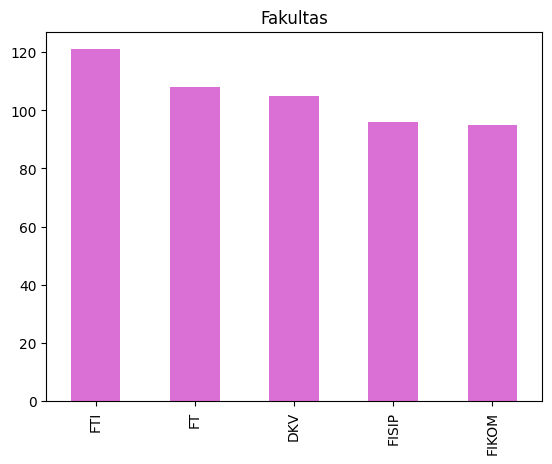

time: 141 ms (started: 2022-10-01 15:51:05 +07:00)


In [69]:
gg['Fakultas'].value_counts().plot(kind = 'bar', title = 'Fakultas', color = 'orchid')

In [70]:
gg.to_csv('Hasil Prediksi Data Test.csv', index = False)

time: 15 ms (started: 2022-10-01 15:51:50 +07:00)
